## 작은 모델 생성하기

28로 시작하는 BSSID를 가지는 와이파이가 다시 안잡혀서,  
새로운 모델을 작성하기로 결정!

### 01. 데이터 추출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pprint import pprint

In [2]:
cut_off_data = pd.read_csv("./data/cut_off_data.csv", index_col="Unnamed: 0")
cut_off_data.describe()

,28:c2:dd:70:6f:51,28:c2:dd:70:70:4b,28:c2:dd:70:70:4f,28:c2:dd:70:70:51,28:c2:dd:70:93:0d,68:ca:e4:47:51:80,68:ca:e4:47:51:81,68:ca:e4:47:51:8e,68:ca:e4:47:51:8f,magnetic_x,magnetic_y,magnetic_z,x,y
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,-71.622222,-67.552381,-68.406349,-69.765079,-71.768254,-61.307937,-61.076190,-60.263492,-60.260317,13.387937,-7.886032,-24.215238,6.326984,2.561905
std,10.841658,11.478571,9.765725,8.579456,10.608866,10.578962,10.582429,13.887300,13.883576,19.132335,20.894651,18.166040,4.332267,4.204010
min,-88.000000,-86.000000,-85.000000,-81.000000,-100.000000,-83.000000,-83.000000,-100.000000,-100.000000,-27.800001,-48.100002,-63.900002,0.000000,-8.000000
25%,-81.000000,-76.000000,-77.000000,-80.000000,-77.000000,-69.000000,-69.000000,-69.000000,-69.000000,-2.050000,-23.200001,-35.450001,2.000000,0.000000
50%,-73.000000,-64.000000,-67.000000,-70.000000,-68.000000,-59.000000,-59.000000,-55.000000,-55.000000,17.100000,-7.200000,-29.000000,7.000000,3.000000
75%,-63.000000,-61.000000,-61.000000,-63.000000,-64.000000,-52.000000,-51.000000,-49.000000,-49.000000,24.800000,8.950000,-16.450001,10.000000,7.000000
max,-52.000000,-47.000000,-51.000000,-53.000000,-56.000000,-46.000000,-44.000000,-45.000000,-45.000000,49.700001,35.200001,39.200001,12.000000,8.000000


In [3]:
drop_list = [
    '28:c2:dd:70:6f:51',
    '28:c2:dd:70:70:4b',
    '28:c2:dd:70:70:4f',
    '28:c2:dd:70:70:51',
    '28:c2:dd:70:93:0d'
]
cut_off_data.drop(drop_list, axis=1, inplace=True)
cut_off_data.describe()

,68:ca:e4:47:51:80,68:ca:e4:47:51:81,68:ca:e4:47:51:8e,68:ca:e4:47:51:8f,magnetic_x,magnetic_y,magnetic_z,x,y
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,-61.307937,-61.076190,-60.263492,-60.260317,13.387937,-7.886032,-24.215238,6.326984,2.561905
std,10.578962,10.582429,13.887300,13.883576,19.132335,20.894651,18.166040,4.332267,4.204010
min,-83.000000,-83.000000,-100.000000,-100.000000,-27.800001,-48.100002,-63.900002,0.000000,-8.000000
25%,-69.000000,-69.000000,-69.000000,-69.000000,-2.050000,-23.200001,-35.450001,2.000000,0.000000
50%,-59.000000,-59.000000,-55.000000,-55.000000,17.100000,-7.200000,-29.000000,7.000000,3.000000
75%,-52.000000,-51.000000,-49.000000,-49.000000,24.800000,8.950000,-16.450001,10.000000,7.000000
max,-46.000000,-44.000000,-45.000000,-45.000000,49.700001,35.200001,39.200001,12.000000,8.000000


In [4]:
cut_off_data.to_csv("./data/small_cut_off.csv")

### 02. 데이터 정규화

In [5]:
_X = cut_off_data.drop(['x', 'y'], axis=1)
_Y = cut_off_data[['x', 'y']]

In [7]:
scaler = StandardScaler()
_scaled_X = scaler.fit_transform(_X.values)

In [8]:
scaled_X_df = pd.DataFrame(_scaled_X, columns=_X.columns)
scaled_X_df.dtypes

68:ca:e4:47:51:80    float64
68:ca:e4:47:51:81    float64
68:ca:e4:47:51:8e    float64
68:ca:e4:47:51:8f    float64
magnetic_x           float64
magnetic_y           float64
magnetic_z           float64
dtype: object

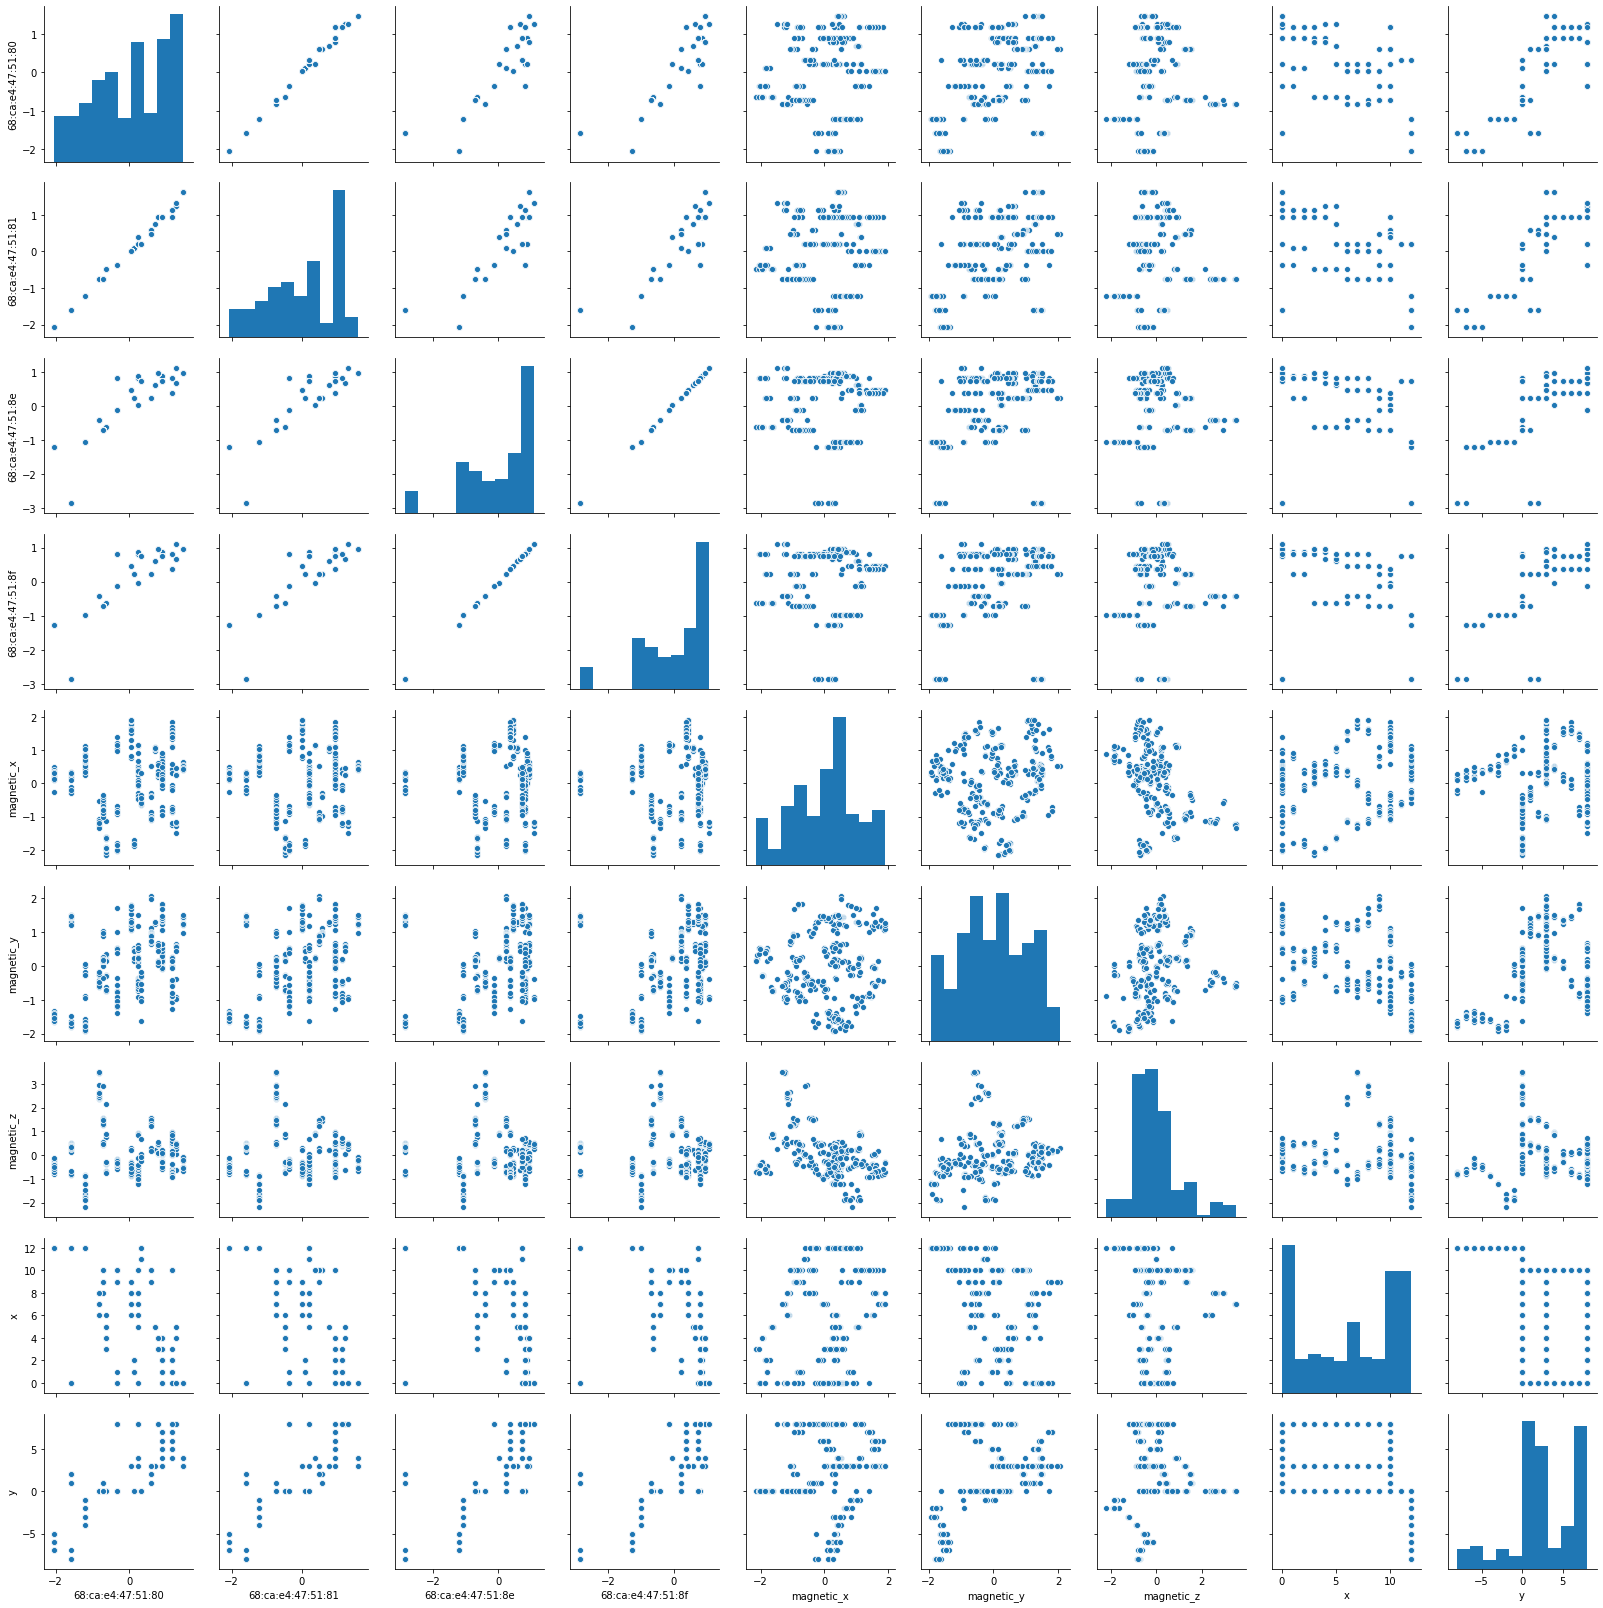

In [10]:
sns.pairplot(pd.concat([scaled_X_df, _Y], axis=1))

In [11]:
scaled_X_df.describe()

,68:ca:e4:47:51:80,68:ca:e4:47:51:81,68:ca:e4:47:51:8e,68:ca:e4:47:51:8f,magnetic_x,magnetic_y,magnetic_z
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02
mean,2.142907e-16,-2.255691e-17,2.255691e-16,-2.255691e-17,2.255691e-17,4.511382e-17,-3.383537e-17
std,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00
min,-2.053753e+00,-2.075014e+00,-2.865909e+00,-2.866906e+00,-2.156217e+00,-1.927668e+00,-2.188034e+00
25%,-7.282664e-01,-7.499617e-01,-6.301015e-01,-6.304995e-01,-8.081868e-01,-7.340795e-01,-6.194326e-01
50%,2.185100e-01,1.965044e-01,3.796178e-01,3.794906e-01,1.943291e-01,3.288512e-02,-2.638095e-01
75%,8.812534e-01,9.536773e-01,8.123547e-01,8.123436e-01,5.974295e-01,8.070400e-01,4.281392e-01
max,1.449319e+00,1.616204e+00,1.100846e+00,1.100912e+00,1.900962e+00,2.065341e+00,3.496422e+00


In [12]:
scaled_X_df.to_csv("./data/small_scaled_X.csv")
_Y.to_csv("./data/small_Y.csv")

In [13]:
from sklearn.externals import joblib
joblib.dump(scaler, "./data/small_std_scaler.pickle")

/home/gwak/anaconda3/envs/cpl/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./data/small_std_scaler.pickle']

### 03. 신경망 학습

In [15]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [16]:
_X = pd.read_csv("./data/small_scaled_X.csv", index_col='Unnamed: 0')
_Y = pd.read_csv("./data/small_Y.csv", index_col='Unnamed: 0')

In [17]:
_X_vals = _X.values
_Y_vals = _Y.values

In [37]:
# loss function
def rmse(real, predict, scale=0.45):
    return np.sqrt(mean_squared_error(real * scale, predict * scale))

# setting model
def set_model():
    opt = Adam(lr=0.05)
    model = Sequential()
    model.add(Dense(7, input_dim=7, activation='sigmoid'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation="linear"))
    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


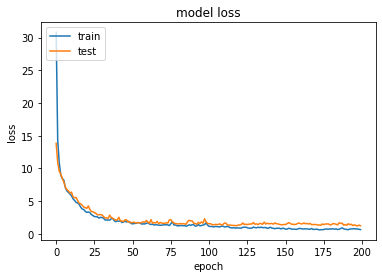

#0:
  train rmse score: 0.3333118067873026
  test  rmse score: 0.49831011379423873
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


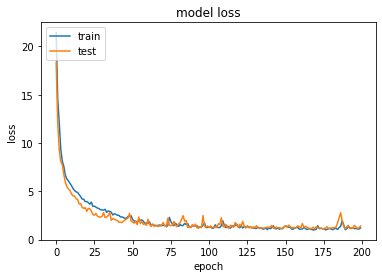

#1:
  train rmse score: 0.4958430161380383
  test  rmse score: 0.5350258411517781
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


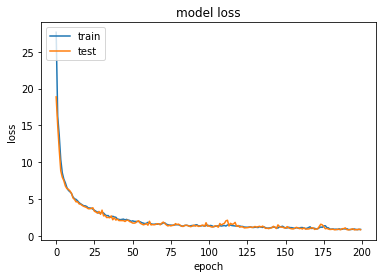

#2:
  train rmse score: 0.40925048113154233
  test  rmse score: 0.41710547089521693
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


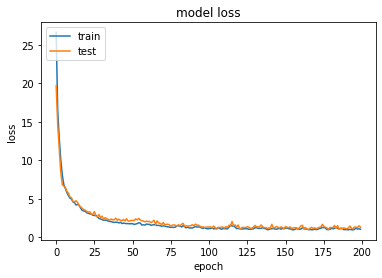

#3:
  train rmse score: 0.4482892860779938
  test  rmse score: 0.5158848267156103
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


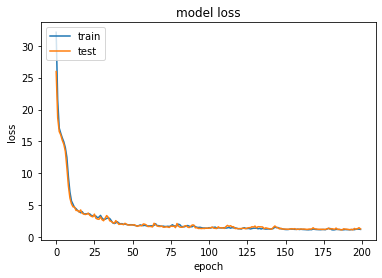

#4:
  train rmse score: 0.4739146723400998
  test  rmse score: 0.508576576624829


In [38]:
## 5-fold cross-validation test
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
mse_test_scores = []
models = []

for i, (train_index, test_index) in enumerate(sss.split(_X_vals, _Y_vals)):
    x_train, x_test = _X_vals[train_index], _X_vals[test_index]
    y_train, y_test = _Y_vals[train_index], _Y_vals[test_index]

    model = set_model()
    history = model.fit(
        x_train, y_train, 
        validation_data=(x_test, y_test),
        epochs=200,
        verbose=0
    )
    
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    y_predict = model.predict(x_test)
    test_score = rmse(y_test, y_predict)
    mse_test_scores.append(test_score)

    print(f"#{i}:")
    print("  train rmse score:", rmse(y_train, model.predict(x_train)))
    print("  test  rmse score:", test_score)
    
    models.append(model)

### 04. k-NN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
model_list = []
def model_5fold_test(model):
    global _X_vals, _Y_vals
    global model_list
    
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
    mse_test_scores = []

    for i, (train_index, test_index) in enumerate(sss.split(_X_vals, _Y_vals)):
        x_train, x_test = _X_vals[train_index], _X_vals[test_index]
        y_train, y_test = _Y_vals[train_index], _Y_vals[test_index]

        # model = ModelClass()
        model.__init__()
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        test_score = rmse(y_test, y_predict)
        mse_test_scores.append(test_score)

        print(f"#{i}:")
        print("  train rmse score:", rmse(y_train, model.predict(x_train)))
        print("  test  rmse score:", test_score)
        
        model_list.append(model)
        
    return np.mean(mse_test_scores)

In [45]:
model_list = []
print(
    "\nThe 5-fold average rmse of KNeighborsRegressor(n=1):\n", 
    model_5fold_test(KNeighborsRegressor(n_neighbors=1))
)

#0:
  train rmse score: 0.300775782649753
  test  rmse score: 0.3488450331348537
#1:
  train rmse score: 0.32231306874793986
  test  rmse score: 0.30751306592449973
#2:
  train rmse score: 0.32330878650072503
  test  rmse score: 0.419923462413943
#3:
  train rmse score: 0.33481071411428015
  test  rmse score: 0.42585208699735183
#4:
  train rmse score: 0.3430144728308538
  test  rmse score: 0.24266378857529253

The 5-fold average rmse of KNeighborsRegressor(n=1):
 0.34895948740918814


In [46]:
model_list[1].score(_X_vals, _Y_vals)

/home/gwak/anaconda3/envs/cpl/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9712065078615578

In [47]:
joblib.dump(model_list[1], "./data/small_1nn_model.sav")

['./data/small_1nn_model.sav']